# Analysis data thresholds (Black_wf_WholeBrain Control vs Fam)

## Overview

This script is designed for analyzing cell activity data of the experimental group **Black_wf_WholeBrain** across **two** conditions **Control vs FAM** and thresholds **[500,1500,2500,3500,4500,5500,6500]**. The analysis includes plotting the number of detected cells, performing t-tests, and other statistical methods to compare groups. It handles data from various brain regions and experimental conditions and includes both visual and statistical analysis.

### Major Components
- **Data Import and Preparation**: The script imports necessary libraries, loads volumes from an external module, and reads subject data from a specific directory.
- **Statistical Analysis**: Various statistical analyses such as calculating the ratio of detected cells, plotting these values, and performing Kruskal-Wallis tests are included.
- **Visualization**: Seaborn and Matplotlib are used for plotting line plots, box plots, heatmaps, and histograms to visually represent the results.
- **Partial Least Squares (PLS) Analysis**: A key part of the script uses PLS to understand relationships between brain regions and experimental conditions.

---

## Script Breakdown

### 1. Data Setup
- **Import Libraries**: The script starts by importing necessary libraries such as `pandas`, `seaborn`, and `matplotlib`. It also imports custom modules `utils`, `utils_PLS`, and `utils_thresholds` for data processing and analysis.
- **Volume Cleaning**: `ace.clean_volumes_database()` is called to clean up the volume data.
- **Subject and Experiment Setup**: The paths to the experimental data are set up, and the subject data is loaded by reading from directories based on experiment type and group.

### 2. Grouping Subjects
- **Dividing Experimental Groups**: The subjects are divided into experimental groups using the `utils.divide_in_exp_groups` function, which assigns subjects to 'Control' and 'Fam' groups for analysis.

### 3. Ratio of Detected Cells
- **Cell Detection Ratio**: The script calculates the ratio of detected cells over cells used for analysis using the `ut.calculate_ratio_detected_cells()` function. It creates a dataframe that stores the ratio across different thresholds for each subject.
- **Visualizing Results**: Several line plots and box plots are generated to visualize the ratio of detected cells across thresholds and subjects. The script provides side-by-side visualizations for including and excluding a threshold value (500).

### 4. Total Number of Cells
- **Summing Detected Cells**: The total number of detected cells across subjects and thresholds is calculated using `ut.sum_values()`. The results are plotted using the `ut.plot_values()` function. Separate plots are generated for all thresholds and for values excluding the threshold of 500.

### 5. Single Area Analysis
- **Area-Specific Analysis**: The script performs cell activity analysis in specific brain regions such as the "Main olfactory bulb", "Medial amygdalar nucleus", and others. Data is aggregated by area using `ut.dataframe_areas()`, and results are visualized through box plots.

### 6. T-test and Significant Areas Analysis
- **T-test for Area Activation**: A t-test is conducted to compare area activation across experimental groups for different thresholds. The `common_areas` dictionary identifies areas commonly activated across all thresholds.
- **Significant Areas**: The number of significant areas is calculated across thresholds using a custom function, and results are displayed in a bar plot for each group and threshold combination.

### 7. Correlation Matrices
- **Correlation Across Thresholds**: Correlation matrices are computed for each group and threshold using custom functions. The script visualizes these correlations in a heatmap to compare activation patterns across subjects and experimental conditions.

### 8. Partial Least Squares (PLS) Analysis
- **PLS for Relative Density**: The script creates PLS models using `upls.format_data_pls` to study the relative density of cell activation across groups and thresholds. The output is saved to CSV files for further analysis.
- **Contrast and Salience Plots**: Results from PLS are visualized in contrast plots and salience histograms to understand how different brain regions contribute to the overall model.

### 9. Kruskal-Wallis Test
- **Non-parametric Statistical Test**: A Kruskal-Wallis test is performed using `ace.kruskal_per_area()` to detect significant differences in cell activation across experimental groups at different thresholds. This test is used to handle non-normally distributed data.

### 10. Threshold Overlap Analysis
- **Checking Overlap**: The script checks for overlapping significant areas across all thresholds and outputs the number of significant areas for further validation.

---

## Statistical Analysis Methods

### Ratio of Detected Cells
- **Purpose**: This analysis calculates the ratio of detected cells to total cells used for analysis across different thresholds. It helps in understanding how the threshold affects cell detection sensitivity.
- **Visualization**: Line plots and box plots are used to compare the ratio across subjects and thresholds.

### T-test
- **Purpose**: The t-test compares the means of area activation between different experimental groups (Control and Fam) to identify areas with statistically significant differences.

### Kruskal-Wallis Test
- **Purpose**: A non-parametric test used to compare multiple groups, testing whether samples originate from the same distribution. It is useful for handling data that do not meet the assumptions of ANOVA.
- **Application**: The test is applied to each brain area at different thresholds, and results are compared across thresholds to find consistent activation patterns.

### Partial Least Squares (PLS)
- **Purpose**: PLS is used to analyze relationships between observed variables (relative density of cell activation) and latent variables (underlying patterns or components) across groups and thresholds.
- **Visualization**: The script visualizes contrasts and saliences, showing how different brain regions contribute to the experimental conditions.


In [7]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yaml
from yaml import Loader
import numpy as np
import analyze_cells_energy as ace
import utils
import matplotlib.colors as cm
import utils_PLS as upls
import utils_thresholds as ut

volumes = ace.clean_volumes_database()

root_directory = '/home/stella/Documents/Torino/projects/'
experiment = 'SexualImprinting'
experimental_group = 'Black_wf_WholeBrain'
data_directory = root_directory + experiment + '/' \
                + experimental_group + '/'
subjects = [name for name in os.listdir(data_directory) \
            if os.path.isdir(os.path.join(data_directory, name))]

def load_subject(subject, data_directory, threshold):
    file_suffix = 'cells_' + str(threshold)
    df_mouse = pd.read_csv(data_directory + subject + '/' + file_suffix + '.csv')
    df_mouse = ace.reformat_df_mouse(df=df_mouse)
    
    return df_mouse

thresholds = [500, 1500, 2500, 3500, 4500, 5500, 6500]

/home/stella/anaconda2/envs/ClearMap/lib/python3.6/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [8]:
subjects = ['BL45Control', 'BL51Control', 'BL53Control',
           'BL47Fam', 'BL49Fam', 'BL50Fam']
experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects,
                                                group_labels = ['Control', 'Fam'])
experimental_groups

{'Control': ['BL45Control', 'BL51Control', 'BL53Control'],
 'Fam': ['BL47Fam', 'BL49Fam', 'BL50Fam']}

# Plot ratio of detected cells over cells used for analysis

In [14]:
ratio = ut.calculate_ratio_detected_cells(subjects=subjects, 
                                       thresholds=thresholds,
                                         data_directory=data_directory)

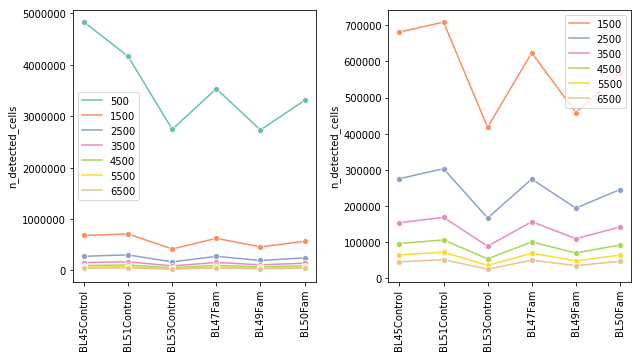

In [15]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
plt.subplots_adjust(wspace=0.3)

sns.lineplot(data=ratio, x='subject', y='n_detected_cells', hue='threshold', ax=axes[0], 
             legend=True, palette='Set2', marker="o")
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_xlabel('')
axes[0].legend().set_title('')

cmap = [plt.cm.Set2(i) for i in range(1, len(thresholds))]
sns.lineplot(data=ratio[ratio['threshold']!=500], 
             x='subject', y='n_detected_cells', hue='threshold', ax=axes[1], legend=True
            , palette=cmap, marker="o")
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_xlabel('')
axes[1].legend().set_title('')

Text(0.5, 1.0, 'Excluding threshold 500')

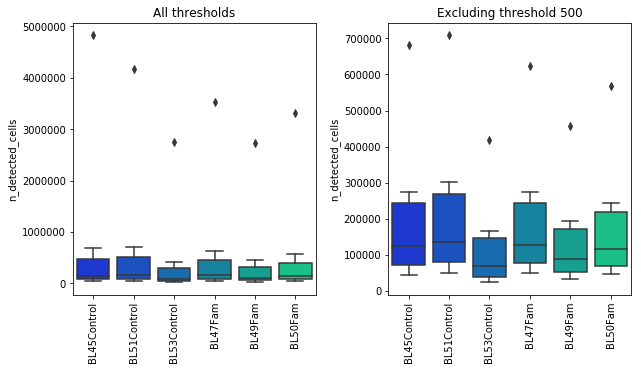

In [16]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
plt.subplots_adjust(wspace=0.3)

sns.boxplot(data=ratio, x='subject', y='n_detected_cells', ax=axes[0], 
             palette='winter')
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_xlabel('')
axes[0].set_title('All thresholds')

sns.boxplot(data=ratio[ratio['threshold']!=500], 
             x='subject', y='n_detected_cells', ax=axes[1], 
            palette='winter')
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_xlabel('')
axes[1].set_title('Excluding threshold 500')

Text(0.5, 0, '')

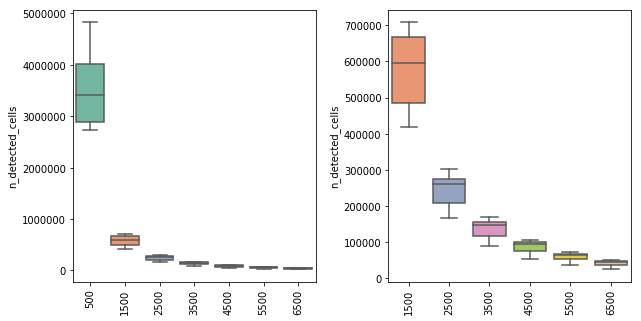

In [17]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
plt.subplots_adjust(wspace=0.3)

sns.boxplot(data=ratio, x='threshold', y='n_detected_cells', ax=axes[0], 
             palette='Set2')
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_xlabel('')
cmap = [plt.cm.Set2(i) for i in range(1, len(thresholds))]
sns.boxplot(data=ratio[ratio['threshold']!=500], 
             x='threshold', y='n_detected_cells', ax=axes[1], 
            palette=cmap)
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_xlabel('')

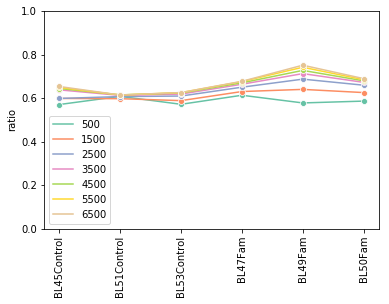

In [18]:
fig, axes = plt.subplots(1,1)
plt.subplots_adjust(hspace=0.06)
sns.lineplot(data=ratio, x='subject', y='ratio', hue='threshold', ax=axes, legend=True, palette='Set2', marker="o")
axes.tick_params(axis='x', rotation=90)
axes.set_xlabel('')
axes.set_ylim([0,1])
plt.gca().legend().set_title('')

(0, 1)

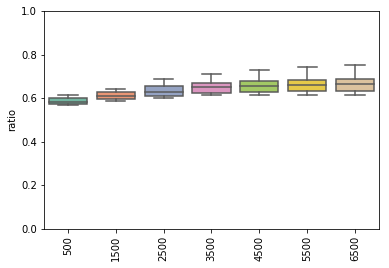

In [19]:
fig, axes = plt.subplots(1,1)
plt.subplots_adjust(hspace=0.06)
sns.boxplot(data=ratio, x='threshold', y='ratio', ax=axes, palette='Set2')
axes.tick_params(axis='x', rotation=90)
axes.set_xlabel('')
axes.set_ylim([0,1])

# Plot total number of cells

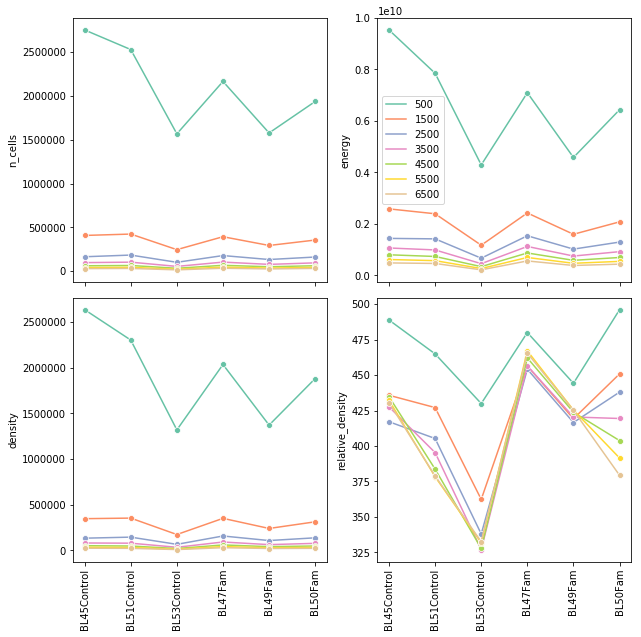

In [21]:
data = ut.sum_values(subjects=subjects, 
                     thresholds=thresholds,
                    data_directory=data_directory)

ut.plot_values(data)

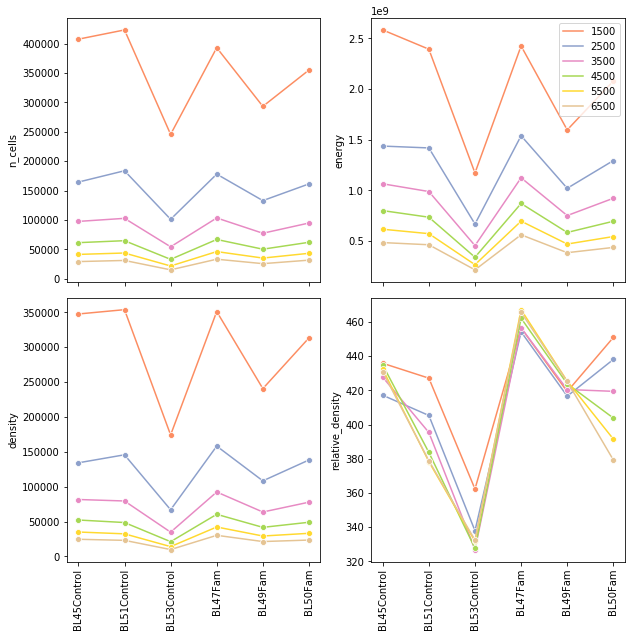

In [22]:
cmap = [plt.cm.Set2(i) for i in range(1, len(thresholds))]
data = ut.sum_values(subjects=subjects, thresholds=thresholds[1:],
                    data_directory=data_directory)

ut.plot_values(data, palette=cmap)

# Plot single areas

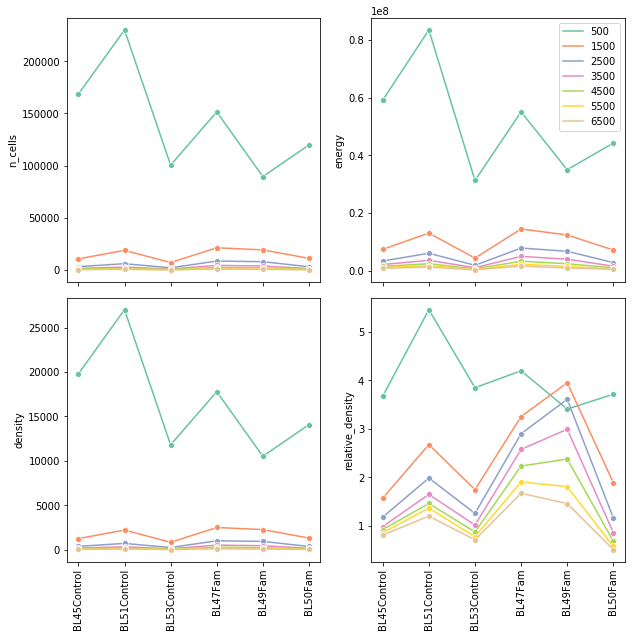

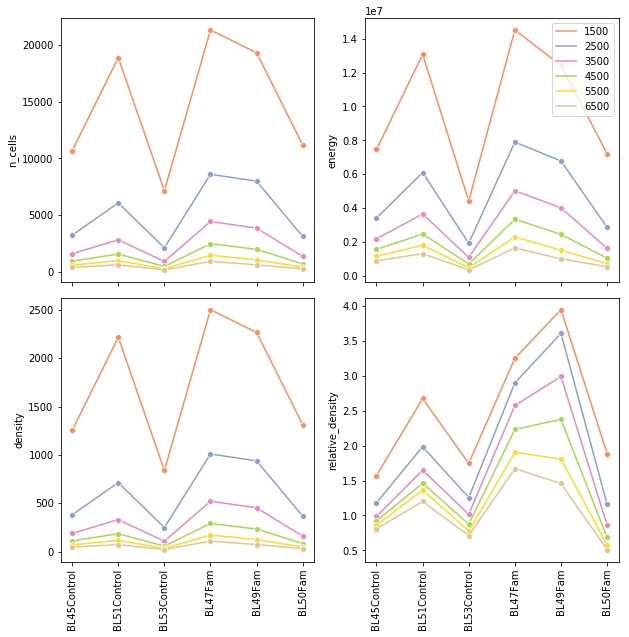

In [24]:
data = ut.dataframe_areas(area="Main olfactory bulb",
                      subjects=subjects,
                      thresholds=thresholds,
                         data_directory=data_directory)
ut.plot_values(data)
cmap = [plt.cm.Set2(i) for i in range(1, len(thresholds))]
data = ut.dataframe_areas(area="Main olfactory bulb",
                      subjects=subjects,
                      thresholds=thresholds[1:],
                         data_directory=data_directory)
ut.plot_values(data, palette=cmap)


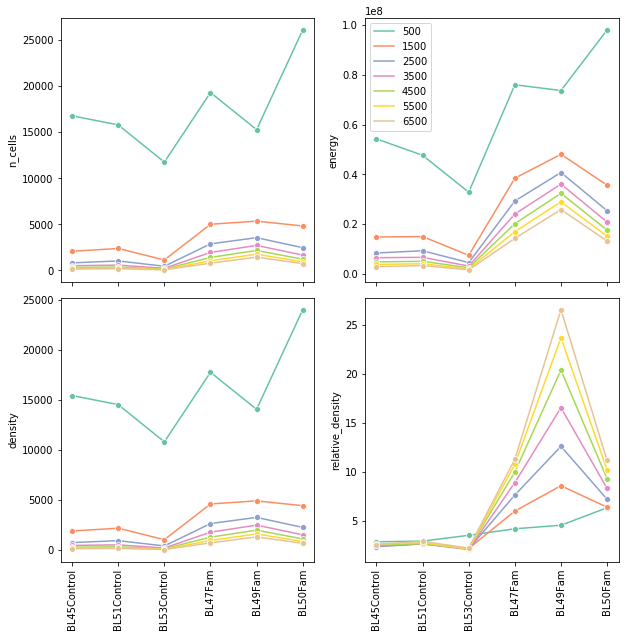

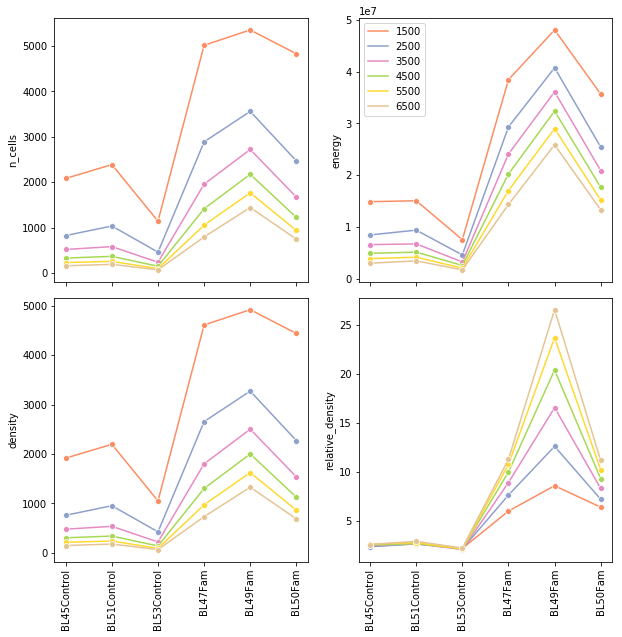

In [25]:
data = ut.dataframe_areas(area="Medial amygdalar nucleus",
                      subjects=subjects,
                      thresholds=thresholds,
                         data_directory=data_directory)
ut.plot_values(data)
cmap = [plt.cm.Set2(i) for i in range(1, len(thresholds))]
data = ut.dataframe_areas(area="Medial amygdalar nucleus",
                      subjects=subjects,
                      thresholds=thresholds[1:],
                         data_directory=data_directory)
ut.plot_values(data, palette=cmap)


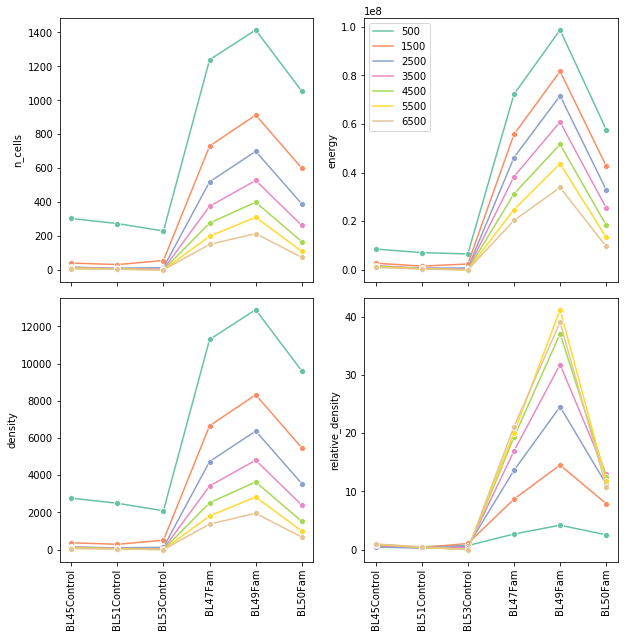

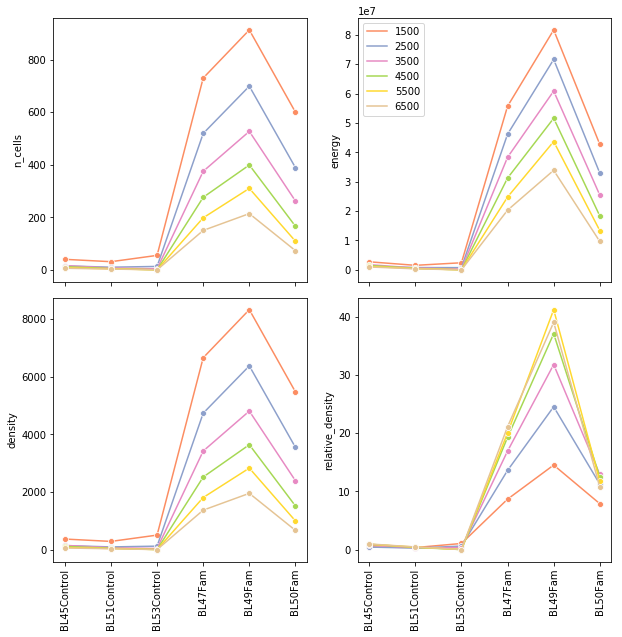

In [26]:
data = ut.dataframe_areas(area="Ventral premammillary nucleus",
                      subjects=subjects,
                      thresholds=thresholds,
                         data_directory=data_directory)
ut.plot_values(data)
cmap = [plt.cm.Set2(i) for i in range(1, len(thresholds))]
data = ut.dataframe_areas(area="Ventral premammillary nucleus",
                      subjects=subjects,
                      thresholds=thresholds[1:],
                         data_directory=data_directory)
ut.plot_values(data, palette=cmap)


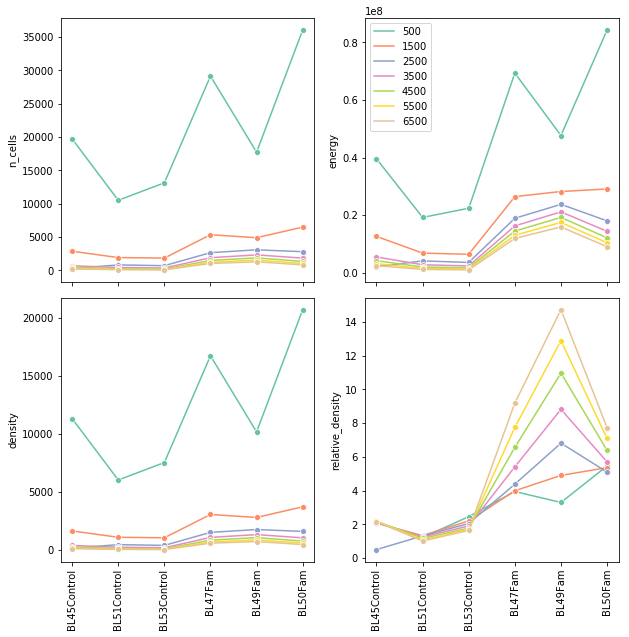

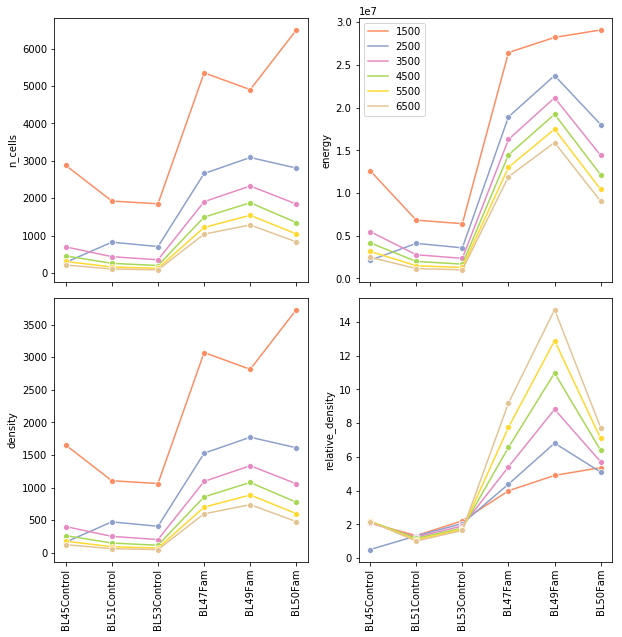

In [27]:
data = ut.dataframe_areas(area="Cortical amygdalar area",
                      subjects=subjects,
                      thresholds=thresholds,
                         data_directory=data_directory)
ut.plot_values(data)
cmap = [plt.cm.Set2(i) for i in range(1, len(thresholds))]
data = ut.dataframe_areas(area="Cortical amygdalar area",
                      subjects=subjects,
                      thresholds=thresholds[1:],
                         data_directory=data_directory)
ut.plot_values(data, palette=cmap)


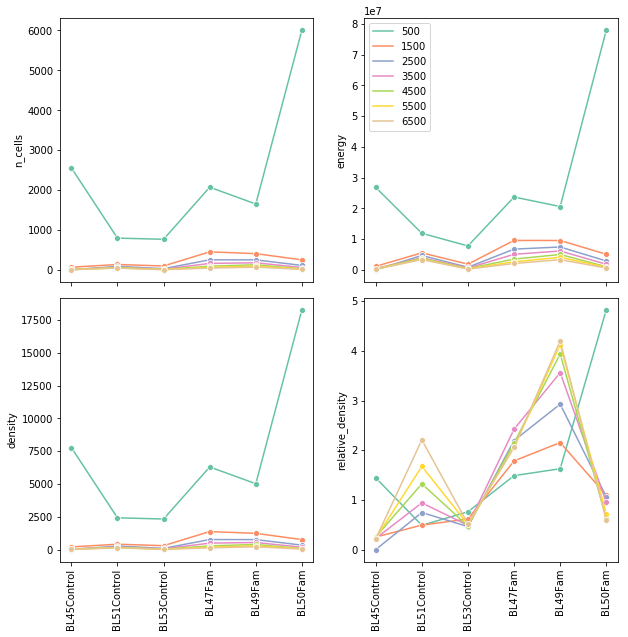

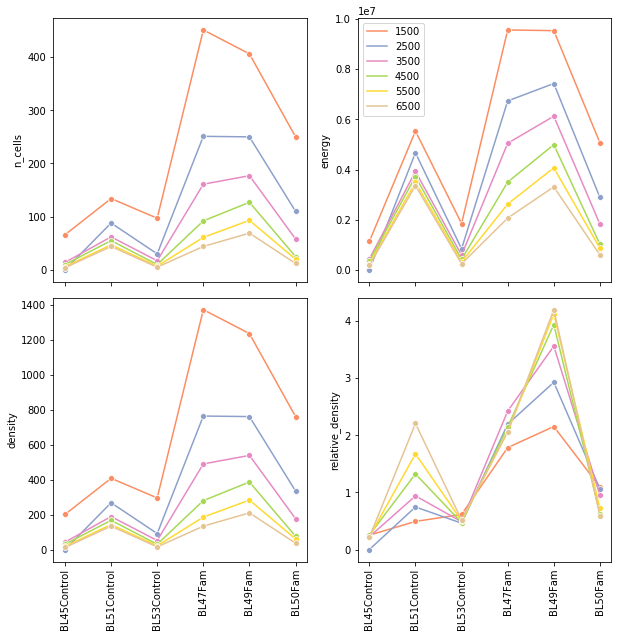

In [28]:
data = ut.dataframe_areas(area="Arcuate hypothalamic nucleus",
                      subjects=subjects,
                      thresholds=thresholds,
                         data_directory=data_directory)
ut.plot_values(data)
cmap = [plt.cm.Set2(i) for i in range(1, len(thresholds))]
data = ut.dataframe_areas(area="Arcuate hypothalamic nucleus",
                      subjects=subjects,
                      thresholds=thresholds[1:],
                         data_directory=data_directory)
ut.plot_values(data, palette=cmap)


# T-test for mean area activation across groups

In [30]:
dict500 = {subject: pd.read_csv(data_directory+subject+'/'+subject+str(500)+'.csv')
                            for subject in subjects}
df_sigareas500 = ut.find_significant_areas(dictionary=dict500,
                                    experimental_groups=experimental_groups,
                                       groups=['Control', 'Fam'])
df_sigareas500

,Control_vs_Fam
0,Ventral premammillary nucleus
1,Lateral mammillary nucleus
2,Ventrolateral preoptic nucleus
3,Periventricular hypothalamic nucleus posterior...
4,Intergeniculate leaflet of the lateral genicul...
5,Posterior amygdalar nucleus
6,Rhomboid nucleus


In [31]:
dict1500 = {subject: pd.read_csv(data_directory+subject+'/'+subject+str(1500)+'.csv')
                            for subject in subjects}
df_sigareas1500 = ut.find_significant_areas(dictionary=dict1500,
                                    experimental_groups=experimental_groups,
                                       groups=['Control', 'Fam'])
df_sigareas1500

,Control_vs_Fam
0,Intercalated amygdalar nucleus
1,Basomedial amygdalar nucleus
2,Parataenial nucleus
3,Parafascicular nucleus
4,Lateral posterior nucleus of the thalamus
5,Arcuate hypothalamic nucleus
6,Posterodorsal preoptic nucleus
7,Periventricular hypothalamic nucleus posterior...
8,Medial amygdalar nucleus
9,Posterior amygdalar nucleus


In [32]:
dict2500 = {subject: pd.read_csv(data_directory+subject+'/'+subject+str(2500)+'.csv')
                            for subject in subjects}
df_sigareas2500 = ut.find_significant_areas(dictionary=dict2500,
                                    experimental_groups=experimental_groups,
                                       groups=['Control', 'Fam'])
df_sigareas2500

,Control_vs_Fam
0,Posterodorsal preoptic nucleus
1,Vascular organ of the lamina terminalis
2,Piriform-amygdalar area
3,Cortical amygdalar area
4,Tuberomammillary nucleus
5,Endopiriform nucleus
6,Parataenial nucleus
7,Piriform area
8,Nucleus of the lateral olfactory tract
9,Medial amygdalar nucleus


In [33]:
dict3500 = {subject: pd.read_csv(data_directory+subject+'/'+subject+str(3500)+'.csv')
                            for subject in subjects}
df_sigareas3500 = ut.find_significant_areas(dictionary=dict3500,
                                    experimental_groups=experimental_groups,
                                       groups=['Control', 'Fam'])
df_sigareas3500

,Control_vs_Fam
0,Posterodorsal preoptic nucleus
1,Parafascicular nucleus
2,Piriform-amygdalar area
3,Medial amygdalar nucleus
4,Ventral premammillary nucleus
5,Tuberomammillary nucleus
6,Periventricular hypothalamic nucleus posterior...
7,Posterior hypothalamic nucleus
8,Intercalated amygdalar nucleus
9,Cortical amygdalar area


In [34]:
dict4500 = {subject: pd.read_csv(data_directory+subject+'/'+subject+str(4500)+'.csv')
                            for subject in subjects}
df_sigareas4500 = ut.find_significant_areas(dictionary=dict4500,
                                    experimental_groups=experimental_groups,
                                       groups=['Control', 'Fam'])
df_sigareas4500

,Control_vs_Fam
0,Subgeniculate nucleus
1,Posterior hypothalamic nucleus
2,Anteroventral periventricular nucleus
3,Cortical amygdalar area
4,Central amygdalar nucleus
5,Endopiriform nucleus
6,Piriform-amygdalar area
7,Agranular insular area
8,Ventral premammillary nucleus
9,Intercalated amygdalar nucleus


In [35]:

dict5500 = {subject: pd.read_csv(data_directory+subject+'/'+subject+str(5500)+'.csv')
                            for subject in subjects}
df_sigareas5500 = ut.find_significant_areas(dictionary=dict5500,
                                    experimental_groups=experimental_groups,
                                       groups=['Control', 'Fam'])
df_sigareas5500

,Control_vs_Fam
0,Induseum griseum
1,Septohippocampal nucleus
2,Interanteromedial nucleus of the thalamus
3,Subthalamic nucleus
4,Lateral posterior nucleus of the thalamus
5,Anteroventral periventricular nucleus
6,Nucleus of the lateral olfactory tract
7,Cortical amygdalar area
8,Agranular insular area
9,Piriform-amygdalar area


In [36]:
dict6500 = {subject: pd.read_csv(data_directory+subject+'/'+subject+str(6500)+'.csv')
                            for subject in subjects}
df_sigareas6500 = ut.find_significant_areas(dictionary=dict6500,
                                    experimental_groups=experimental_groups,
                                       groups=['Control', 'Fam'])
df_sigareas6500

,Control_vs_Fam
0,Interanteromedial nucleus of the thalamus
1,Periventricular hypothalamic nucleus posterior...
2,Piriform area
3,Nucleus of the lateral olfactory tract
4,Agranular insular area
5,Cortical amygdalar area
6,Piriform-amygdalar area
7,Midbrain reticular nucleus retrorubral area
8,Posterior hypothalamic nucleus
9,Medial amygdalar nucleus


## Find common areas across all thresholds

In [37]:
# common areas in Control_vs_Fam
common_areas = {tag: 
list(set(df_sigareas500[tag].dropna()).intersection(
df_sigareas1500[tag].dropna()).intersection(
df_sigareas2500[tag].dropna()).intersection(
df_sigareas3500[tag].dropna()).intersection(
df_sigareas4500[tag].dropna()))
                for tag in df_sigareas500.columns}
common_areas

{'Control_vs_Fam': ['Posterior amygdalar nucleus',
  'Periventricular hypothalamic nucleus posterior part',
  'Ventral premammillary nucleus']}

## Number of significant areas

In [38]:
number_sig_area = pd.DataFrame(columns=['threshold']+ [col for col in df_sigareas500.columns])
for df, t in zip([df_sigareas500,
                df_sigareas1500,
                df_sigareas2500,
                df_sigareas3500,
                df_sigareas4500,
                df_sigareas5500,
                df_sigareas6500],
                thresholds):
    number_sig_area.loc[len(number_sig_area.index)] = [t, 
                                                       len(df['Control_vs_Fam'].dropna())]

Text(0.5, 0, '')

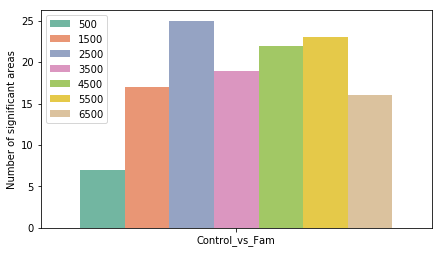

In [39]:
plot_number_sig_area = number_sig_area.set_index('threshold').stack()\
    .reset_index(name='Number of significant areas').rename(columns={'level_1':'group'})

fig, axes = plt.subplots(1,1, figsize=(7,4))
sns.barplot(data=plot_number_sig_area, x='group',
            y='Number of significant areas', hue='threshold', ax=axes, palette='Set2')
axes.legend().set_title('')
axes.set_xlabel('')


## Find common areas across all thresholds

In [40]:
# common areas in Control_vs_Fam
common_areas = {tag: 
list(set(df_sigareas500[tag].dropna()).intersection(
df_sigareas1500[tag].dropna()).intersection(
df_sigareas2500[tag].dropna()).intersection(
df_sigareas3500[tag].dropna()).intersection(
df_sigareas4500[tag].dropna()).intersection(
df_sigareas5500[tag].dropna()).intersection(
df_sigareas6500[tag].dropna())
    )
                for tag in df_sigareas500.columns}
common_areas

{'Control_vs_Fam': ['Posterior amygdalar nucleus',
  'Periventricular hypothalamic nucleus posterior part',
  'Ventral premammillary nucleus']}

# Show correlation matrices

In [43]:
corr_matrices = [ut.corr_matrix(experimental_groups=experimental_groups,
                           dict_results_across_mice=dictionary) for dictionary in [dict500, 
                                                                                   dict1500,
                                                                                   dict2500,
                                                                                   dict3500,
                                                                                   dict4500,
                                                                                   dict5500,
                                                                                   dict6500]] 

RangeIndex(start=0, stop=198, step=1)
RangeIndex(start=0, stop=198, step=1)
RangeIndex(start=0, stop=198, step=1)
RangeIndex(start=0, stop=198, step=1)
RangeIndex(start=0, stop=198, step=1)
RangeIndex(start=0, stop=198, step=1)
RangeIndex(start=0, stop=198, step=1)


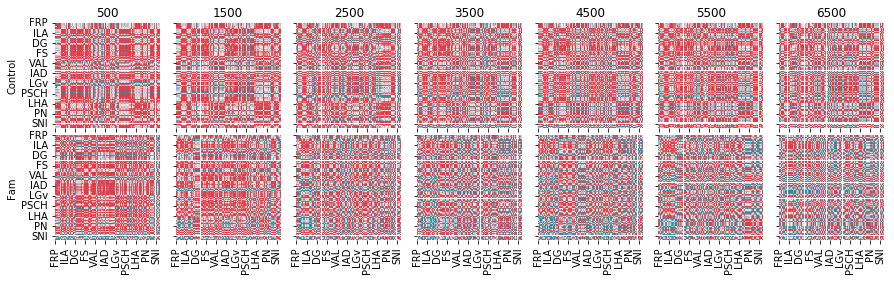

In [44]:
f, ax = plt.subplots(2,7, figsize=(15, 4), sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.07, wspace=0.07)
group_labels = ['Control', 'Fam']
for i, threshold in enumerate(corr_matrices):
    for j, matrix in enumerate(threshold):
        sns.heatmap(matrix,
        cmap=sns.diverging_palette(220, 10, as_cmap=True),
        vmin=-1.0, vmax=1.0,
        square=True, cbar=False, ax=ax[j][i])
        ax[j][i].set_xlabel('')
        ax[j][i].set_ylabel('') if i!=0 else ax[j][i].set_ylabel(group_labels[j])
        if j==0:
            ax[j][i].set_title(str(thresholds[i]))

# Analysis Task PLS

In [46]:
df_levels = upls.create_df_levels(volumes, level=8)
for i, dictionary in enumerate([dict500,dict1500,dict2500,dict3500,dict4500,dict5500,dict6500]):
    dictionary = upls.reformat_dict_acronym(dict_results=dictionary,
                                            volumes=volumes)
    data_relative_density = upls.format_data_pls(dict_results=dictionary, 
                                                 batch='BL_wf_WholeBrain'+str(thresholds[i]), 
                                                 table='relative_density')
    data_relative_density.dropna(inplace=True, axis=1)
    data_relative_density.to_csv('./results_pls/BL_wf_WholeBrain'+str(thresholds[i])\
                                 +'_relative_density.csv')

In [47]:
%%bash
python area_pls.py -i results_pls/BL_wf_WholeBrain500_relative_density.csv -o './results_pls/BL_wf_WholeBrain500_relative_density'

In [48]:
%%bash
python area_pls.py -i results_pls/BL_wf_WholeBrain1500_relative_density.csv -o './results_pls/BL_wf_WholeBrain1500_relative_density'

In [49]:
%%bash
python area_pls.py -i results_pls/BL_wf_WholeBrain2500_relative_density.csv -o './results_pls/BL_wf_WholeBrain2500_relative_density'

In [50]:
%%bash
python area_pls.py -i results_pls/BL_wf_WholeBrain3500_relative_density.csv -o './results_pls/BL_wf_WholeBrain3500_relative_density'

In [51]:
%%bash
python area_pls.py -i results_pls/BL_wf_WholeBrain4500_relative_density.csv -o './results_pls/BL_wf_WholeBrain4500_relative_density'

In [52]:
%%bash
python area_pls.py -i results_pls/BL_wf_WholeBrain5500_relative_density.csv -o './results_pls/BL_wf_WholeBrain5500_relative_density'

In [53]:
%%bash
python area_pls.py -i results_pls/BL_wf_WholeBrain6500_relative_density.csv -o './results_pls/BL_wf_WholeBrain6500_relative_density'

In [54]:
# for t in thresholds:
#     upls.plot_panel_contrasts(batch='BL_wf_WholeBrain'+str(t), 
#                               variable='relative_density')
#     upls.plot_panel_saliences(batch='BL_wf_WholeBrain'+str(t), 
#                               variable='relative_density', 
#                               df_levels=df_levels)

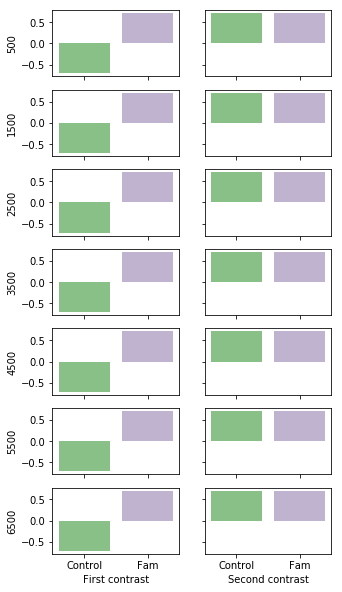

In [55]:
fig, axes = plt.subplots(7,2, figsize=(5,10), sharey=True, sharex=True)
for i in range(len(thresholds)):
    contrasts = pd.read_csv('./results_pls/'+ 'BL_wf_WholeBrain'+str(thresholds[i])+\
                            '_relative_density_contrasts.csv')
    contrasts = contrasts.rename(columns={"group_Control": "Control",
                                          "group_Fam": "Fam"})
    for j in range(2):
        upls.plot_contrasts(df_data=contrasts, index=j, ax=axes[i][j], palette='Accent')
        axes[i][j].set_xlabel(['First contrast',
                                  'Second contrast'][j]) if i == 6 else axes[i][j].set_xlabel('')
        axes[i][j].set_ylabel(thresholds[i]) if j == 0 else axes[i][j].set_ylabel('')


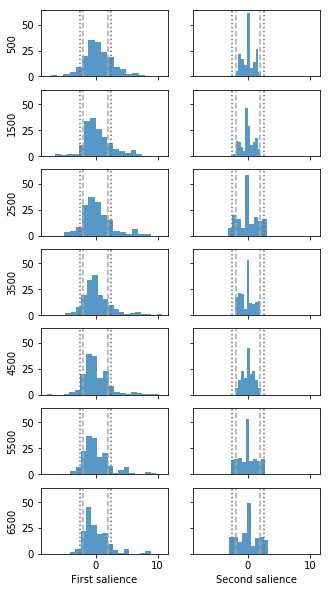

In [56]:
fig, axes = plt.subplots(7,2, figsize=(5,10), sharex=True, sharey=True)
plt.rcParams['patch.edgecolor'] = 'none'
for i in range(len(thresholds)):
    saliences = pd.read_csv('./results_pls/'+ 'BL_wf_WholeBrain'+str(thresholds[i])+\
                            '_relative_density_saliences.csv')
    for j in range(2):
        sns.histplot(saliences.T[j], ax=axes[i][j])
        axes[i][j].axvline(x=1.96, linestyle='--', color='darkgrey')
        axes[i][j].axvline(x=-1.96, linestyle='--', color='darkgrey')
        axes[i][j].axvline(x=2.56, linestyle=':', color='dimgrey')
        axes[i][j].axvline(x=-2.56, linestyle=':', color='dimgrey')
        axes[i][j].set_xlabel(['First salience',
                                  'Second salience',
                                  'Third salience'][j])    
        if j==0:
            axes[i][j].set_ylabel(thresholds[i])

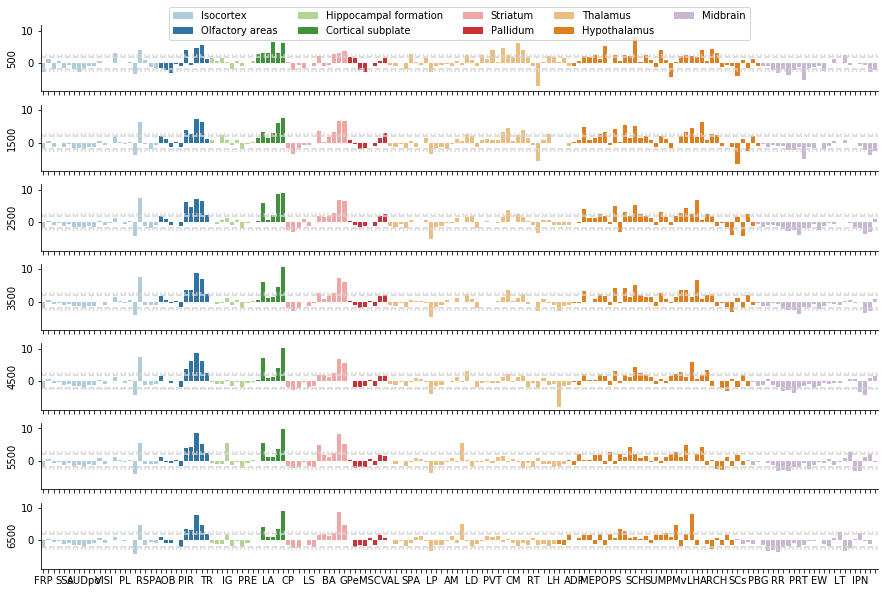

In [58]:
fig, axes = plt.subplots(7,1, figsize=(15,10), sharex=True, sharey=True)
for i in range(len(thresholds)):
    saliences = pd.read_csv('./results_pls/'+ 'BL_wf_WholeBrain'+str(thresholds[i])+\
                            '_relative_density_saliences.csv')
    upls.plot_saliences(df_data=saliences, df_levels=df_levels, 
                        index=0, ax=axes[i], palette='Paired')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(thresholds[i])
    if i!=0:
        axes[i].get_legend().remove()
    sns.despine(left=False, bottom=False)
    n = 4  # Keeps every 7th label
    axes[i].axhline(y=1.96, linestyle='--', color='lightgrey')
    axes[i].axhline(y=-1.96, linestyle='--', color='lightgrey')
    axes[i].axhline(y=2.56, linestyle=':', color='lightgrey')
    axes[i].axhline(y=-2.56, linestyle=':', color='lightgrey')
    [l.set_visible(False) for (i,l) in enumerate(axes[i].xaxis.get_ticklabels()) if i % n != 0]
axes[0].legend(
loc='upper center', 
bbox_to_anchor=(0.5, 1.35),
ncol=5)

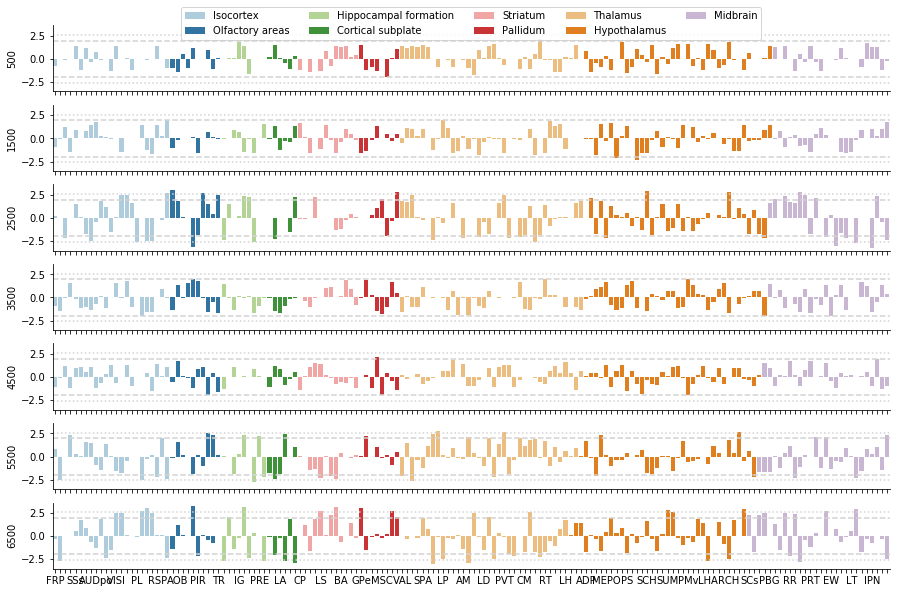

In [59]:
fig, axes = plt.subplots(7,1, figsize=(15,10), sharey=True, sharex=True)
for i in range(len(thresholds)):
    saliences = pd.read_csv('./results_pls/'+ 'BL_wf_WholeBrain'+str(thresholds[i])+\
                            '_relative_density_saliences.csv')
    upls.plot_saliences(df_data=saliences, df_levels=df_levels, 
                        index=1, ax=axes[i], palette='Paired')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(thresholds[i])
    if i!=0:
        axes[i].get_legend().remove()
    sns.despine(left=False, bottom=False)
    n = 4  # Keeps every 7th label
    axes[i].axhline(y=1.96, linestyle='--', color='lightgrey')
    axes[i].axhline(y=-1.96, linestyle='--', color='lightgrey')
    axes[i].axhline(y=2.56, linestyle=':', color='lightgrey')
    axes[i].axhline(y=-2.56, linestyle=':', color='lightgrey')
    [l.set_visible(False) for (i,l) in enumerate(axes[i].xaxis.get_ticklabels()) if i % n != 0]
axes[0].legend(
loc='upper center', 
bbox_to_anchor=(0.5, 1.35),
ncol=5)